Microsoft is today one of the largest technology companies with more than 163,000 employees worldwide. It is known for the Windows operating system which is one of the most popular computer operating systems. 

In this file, we will predict Microsoft stock price with machine learning using Python.

### Microsoft Stock Price Prediction

Windows 10 is one of the operating systems that so many people love about Microsoft. When Microsoft released Windows 10, it was announced that it would be the last version of windows and then Microsoft will only work on its updates. But now Microsoft has once again garnered a lot of attention from the world as the release of Windows 11 is just around the corner. So now will be a good time to predict Microsoft’s stock price as it is getting a lot of attention.

To get a dataset for this task, just follow the steps mentioned below:

1. Visit [Yahoo Finance](https://in.search.yahoo.com/?fr2=inr)
2. Search for **MSFT**
3. Click on **Historical Data**
4. Click on **Download**

After completing the steps mentioned above we will find a dataset about the historical stock prices of Microsoft in our downloads folder.

In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv("MSFT.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-28,210.880005,212.570007,208.059998,209.440002,207.535629,32004900
1,2020-09-29,209.350006,210.070007,206.809998,207.259995,205.375473,24221900
2,2020-09-30,207.729996,211.979996,206.539993,210.330002,208.417557,33829100
3,2020-10-01,213.490005,213.990005,211.320007,212.460007,210.528198,27158400
4,2020-10-02,208.000000,210.990005,205.539993,206.190002,204.315201,33154800


In this dataset, the `Close` column contains the values whose future values we want to predict. So let’s have a closer look at the historical close prices of Microsoft’s stock price:

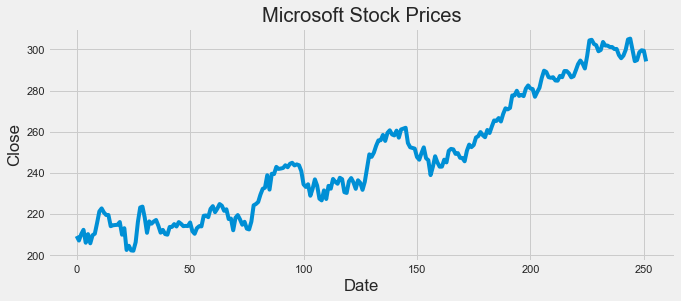

In [4]:
plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

Now let’s have a look at the correlation between the features of this dataset:

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998478  0.998576  0.996567   0.996576 -0.345534
High       0.998478  1.000000  0.998552  0.998511   0.998494 -0.331304
Low        0.998576  0.998552  1.000000  0.998626   0.998644 -0.363875
Close      0.996567  0.998511  0.998626  1.000000   0.999958 -0.353176
Adj Close  0.996576  0.998494  0.998644  0.999958   1.000000 -0.353077
Volume    -0.345534 -0.331304 -0.363875 -0.353176  -0.353077  1.000000


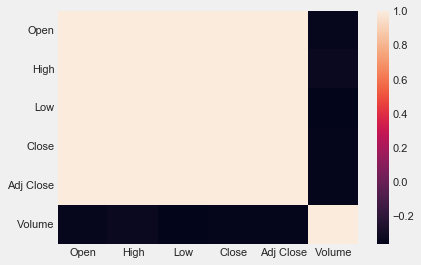

In [5]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

Now we’ll prepare the data to fit into the machine learning model. In this step, we will first add the most important features to `x` and the target column to `y`, and then we will divide the dataset into training and test sets:

In [6]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Now let’s use the Decision Tree Regression Algorithm to train the Microsoft Stock Price prediction model and have a look at the predicted stock prices for the next 5 days:

In [8]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [9]:
data = pd.DataFrame(data={"Predicted Rate": ypred})

In [10]:
data.head()

,Predicted Rate
0,251.490005
1,206.190002
2,232.380005
3,250.779999
4,232.419998
